In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
from sklearn import linear_model, tree, discriminant_analysis, naive_bayes, ensemble, gaussian_process
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
from pycaret.classification import *
from function.data_engineering import *

In [25]:
classifiers = [

    #GLM
    linear_model.LogisticRegressionCV(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     xgb.XGBClassifier()    
]

In [26]:
def find_best_algorithms(classifier_list, X, y):
    # This function is adapted from https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
    # Cross validate model with Kfold stratified cross validation
    kfold = StratifiedKFold(n_splits=5)

    # Grab the cross validation scores for each algorithm
    cv_results = [cross_val_score(classifier, X, y, scoring = "accuracy", cv = kfold) for classifier in classifier_list]
    cv_means = [cv_result.mean() * -1 for cv_result in cv_results]
    cv_std = [cv_result.std() for cv_result in cv_results]
    algorithm_names = [alg.__class__.__name__ for alg in classifiers]

    # Create a DataFrame of all the CV results
    cv_results = pd.DataFrame({
        "Accuracy": cv_means,
        "Accuracy Std": cv_std,
        "Algorithm": algorithm_names
    }).sort_values(by='Accuracy')
    return cv_results

In [27]:
data = pd.read_csv('penyisihan-satria-data-itb-2023/train.csv')
test = pd.read_csv('penyisihan-satria-data-itb-2023/test.csv')
data.index = data.id
test.index = test.id
data = data.iloc[:,1:]
test = test.iloc[:,1:]
or_cols = [c for c in data.columns if c != 'target']
int_cols = [c for c in data.columns if data[c].dtype=='int64' and c != 'target']
float_cols = [c for c in data.columns if data[c].dtype=='float64' and c != 'target']

In [28]:
scaler = MinMaxScaler()
scaler.fit(data[or_cols])
data[or_cols] = scaler.fit_transform(data[or_cols])
test[or_cols] = scaler.transform(test[or_cols])

In [29]:
for col in int_cols:
  tmp_train = freq_encoding(data, col)
tmp_train

,hs,hst,hf,hc,hy,hr,b365h,b365d,bwh,bwd,iwh,iwd,psh,psd,whh,whd,vch,vcd,bb_mx_h,bb_av_h,bb_mx_d,bb_av_d,bb_ou,bb_mx_2_5,bb_av_2_5,bb_mx_2_5_1,bb_av_2_5_1,bb_ah,bb_a_hh,bb_mx_ahh,bb_av_ahh,bb_mx_aha,bb_av_aha,psch,pscd,target,hs_encode,hst_encode,hf_encode,hc_encode,hy_encode,hr_encode,bb_ou_encode,bb_ah_encode
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.617647,0.400000,0.238095,0.555556,0.333333,0.0,0.040565,0.035714,0.043108,0.054054,0.049025,0.060773,0.042074,0.053289,0.044568,0.059406,0.045113,0.041667,0.034918,0.044489,0.038055,0.048077,0.705882,0.468421,0.491124,0.121212,0.137184,0.8,0.409091,0.522059,0.533835,0.196850,0.216667,0.037553,0.041563,0,0.016667,0.108333,0.071667,0.075000,0.258333,0.955,0.070000,0.138333
2,0.558824,0.333333,0.142857,0.444444,0.166667,0.0,0.010027,0.250000,0.010526,0.279279,0.011813,0.314917,0.011252,0.265612,0.013370,0.306931,0.012030,0.250000,0.008915,0.011122,0.242424,0.259615,0.588235,0.168421,0.177515,0.357576,0.407942,0.6,0.227273,0.419118,0.421053,0.283465,0.300000,0.012658,0.196176,0,0.025000,0.136667,0.045000,0.091667,0.301667,0.955,0.140000,0.218333
3,0.441176,0.400000,0.285714,0.388889,0.166667,0.0,0.010027,0.250000,0.011529,0.256757,0.015357,0.281768,0.009785,0.260616,0.011142,0.306931,0.012030,0.250000,0.009287,0.010617,0.242424,0.263112,0.529412,0.163158,0.171598,0.378788,0.404332,0.9,0.272727,0.235294,0.210526,0.519685,0.533333,0.008017,0.267664,0,0.040000,0.108333,0.098333,0.108333,0.301667,0.955,0.146667,0.085000
4,0.705882,0.733333,0.476190,0.333333,0.166667,0.0,0.038286,0.056429,0.039098,0.076577,0.049025,0.060773,0.041096,0.064113,0.047911,0.084158,0.042607,0.062500,0.033432,0.041962,0.059197,0.064685,0.764706,0.321053,0.319527,0.212121,0.238267,0.5,0.454545,0.286765,0.285714,0.417323,0.441667,0.042616,0.055694,0,0.005000,0.025000,0.111667,0.110000,0.301667,0.955,0.053333,0.200000
5,0.529412,0.400000,0.428571,0.166667,0.500000,0.0,0.065634,0.014286,0.072682,0.018018,0.084465,0.016575,0.070939,0.018318,0.080780,0.019802,0.072682,0.016667,0.055349,0.071284,0.009866,0.014860,0.470588,0.668421,0.692308,0.051515,0.061372,0.6,0.500000,0.441176,0.451128,0.259843,0.291667,0.070042,0.017456,0,0.043333,0.108333,0.128333,0.113333,0.131667,0.955,0.161667,0.218333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.411765,0.333333,0.238095,0.277778,0.000000,0.0,0.022334,0.085714,0.026065,0.099099,0.025399,0.149171,0.024951,0.094921,0.027855,0.108911,0.026065,0.083333,0.019316,0.025784,0.087385,0.095280,0.529412,0.426316,0.449704,0.142424,0.162455,0.7,0.363636,0.367647,0.360902,0.354331,0.366667,0.019409,0.121363,1,0.070000,0.136667,0.071667,0.143333,0.248333,0.955,0.146667,0.183333
597,0.558824,0.800000,0.142857,0.388889,0.166667,0.0,0.004558,0.392857,0.005514,0.414414,0.008860,0.392265,0.005382,0.421316,0.006685,0.405941,0.006516,0.375000,0.005201,0.005561,0.383369,0.395105,0.352941,0.136842,0.142012,0.424242,0.501805,0.7,0.181818,0.264706,0.255639,0.456693,0.475000,0.003376,0.570241,1,0.025000,0.015000,0.045000,0.108333,0.301667,0.955,0.048333,0.183333
598,0.382353,0.533333,0.476190,0.277778,0.500000,0.0,0.038286,0.035714,0.042607,0.045045,0.051979,0.055249,0.041096,0.050791,0.047911,0.029703,0.040100,0.041667,0.032318,0.041962,0.038055,0.042832,0.764706,0.610526,0.627219,0.075758,0.083032,0.5,0.454545,0.264706,0.270677,0.448819,0.466667,0.034599,0.051538,1,0.076667,0.056667,0.111667,0.143333,0.131667,0.955,0.053333,0.200000


In [30]:
algorithm_results = find_best_algorithms(classifiers, tmp_train.loc[:,[i for i in tmp_train.columns if i !='target']], datmp_trainta.loc[:,'target'])
algorithm_results

,Accuracy,Accuracy Std,Algorithm
3,-0.710000,0.048705,LinearDiscriminantAnalysis
10,-0.695000,0.051532,GaussianProcessClassifier
0,-0.691667,0.050277,LogisticRegressionCV
8,-0.685000,0.052281,GradientBoostingClassifier
2,-0.680000,0.017951,GaussianNB
5,-0.671667,0.057155,AdaBoostClassifier
9,-0.668333,0.031798,RandomForestClassifier
6,-0.648333,0.032232,BaggingClassifier
7,-0.648333,0.046963,ExtraTreesClassifier
4,-0.583333,0.017480,QuadraticDiscriminantAnalysis


In [31]:
lr_grid = {
    "C": [0.0001, 0.01, 0.05, 0.2, 1],
    "solver": ["newton-cg", "lbfgs", "liblinear"]
}

kfold = StratifiedKFold(n_splits=5)

gs = GridSearchCV(LogisticRegression(), param_grid=lr_grid, cv=kfold, scoring='accuracy')
gs.fit(data.iloc[:,:-1], data.iloc[:,-1])
print("Best log loss: {}".format(gs.best_score_ *-1))
best_lr_params = gs.best_params_

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
exp_name = setup(data = data, target = 'target',fold=5,session_id = 42, )
exp_name

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(600, 36)"
5,Transformed data shape,"(600, 36)"
6,Transformed train set shape,"(420, 36)"
7,Transformed test set shape,"(180, 36)"
8,Numeric features,35
9,Preprocess,True


In [ ]:
#lda
lda = create_model('lda')
tuned_lda = tune_model(lda)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:43:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7999,0.6667,0.7368,0.7000,0.4286,0.4305
1,0.7143,0.7642,0.7143,0.7143,0.7143,0.4286,0.4286
2,0.6786,0.7902,0.5952,0.7143,0.6494,0.3571,0.3622
3,0.6548,0.7364,0.5952,0.6757,0.6329,0.3095,0.3117
4,0.7262,0.7920,0.6905,0.7436,0.7160,0.4524,0.4535
Mean,0.6976,0.7765,0.6524,0.7169,0.6825,0.3952,0.3973
Std,0.0267,0.0234,0.0490,0.0238,0.0346,0.0535,0.0525


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:43:09
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Linear Discriminant Analysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7381,0.7727,0.5476,0.8846,0.6765,0.4762,0.5150
1,0.7381,0.8101,0.7619,0.7273,0.7442,0.4762,0.4767
2,0.6786,0.7942,0.5714,0.7273,0.6400,0.3571,0.3656
3,0.6905,0.7341,0.5714,0.7500,0.6486,0.3810,0.3922
4,0.6786,0.7398,0.5952,0.7143,0.6494,0.3571,0.3622
Mean,0.7048,0.7702,0.6095,0.7607,0.6717,0.4095,0.4224
Std,0.0276,0.0297,0.0777,0.0630,0.0382,0.0551,0.0621


Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

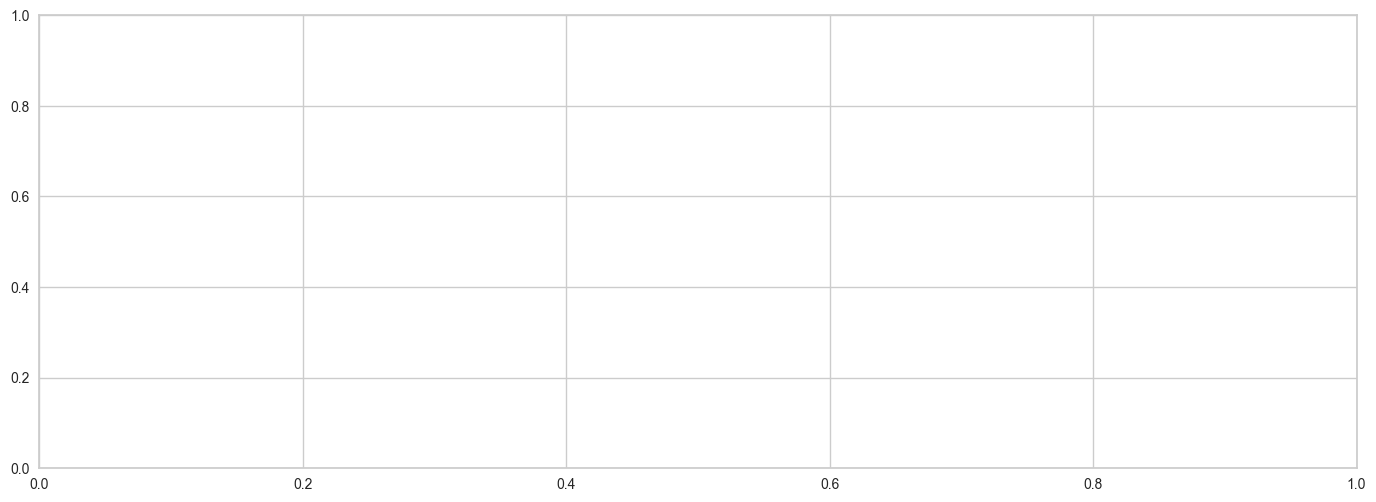

In [ ]:
evaluate_model(tuned_lda)

In [ ]:
#lda
lr = create_model('lr')
tuned_lr = tune_model(lr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:44:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8005,0.7143,0.7895,0.7500,0.5238,0.5262
1,0.6905,0.7965,0.7381,0.6739,0.7045,0.3810,0.3827
2,0.6905,0.8050,0.6190,0.7222,0.6667,0.3810,0.3849
3,0.6429,0.7506,0.5714,0.6667,0.6154,0.2857,0.2887
4,0.7024,0.8231,0.6429,0.7297,0.6835,0.4048,0.4077
Mean,0.6976,0.7951,0.6571,0.7164,0.6840,0.3952,0.3980
Std,0.0381,0.0241,0.0614,0.0443,0.0442,0.0762,0.0760


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:44:21
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7993,0.7143,0.7692,0.7407,0.5000,0.5013
1,0.6786,0.7993,0.7143,0.6667,0.6897,0.3571,0.3581
2,0.7024,0.7993,0.6667,0.7179,0.6914,0.4048,0.4058
3,0.6548,0.7500,0.5952,0.6757,0.6329,0.3095,0.3117
4,0.6905,0.8192,0.6190,0.7222,0.6667,0.3810,0.3849
Mean,0.6952,0.7934,0.6619,0.7103,0.6843,0.3905,0.3924
Std,0.0316,0.0230,0.0486,0.0368,0.0353,0.0632,0.0629


Fitting 5 folds for each of 10 candidates, totalling 50 fits
